This file will be used to add a indicator to each sample {-1: left extreme event, 0: normal event, 1:right extreme event}

In [26]:
import numpy as np
dataset = "BJTaxi"
data_path = fr"D:\omer\ST-SSL\data\{dataset}\train.npz"
x_train = np.load(data_path)["x"]
y_train = np.load(data_path)["y"]

In [27]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")

x_train shape: (3814, 35, 1024, 2), y_train shape: (3814, 1, 1024, 2)


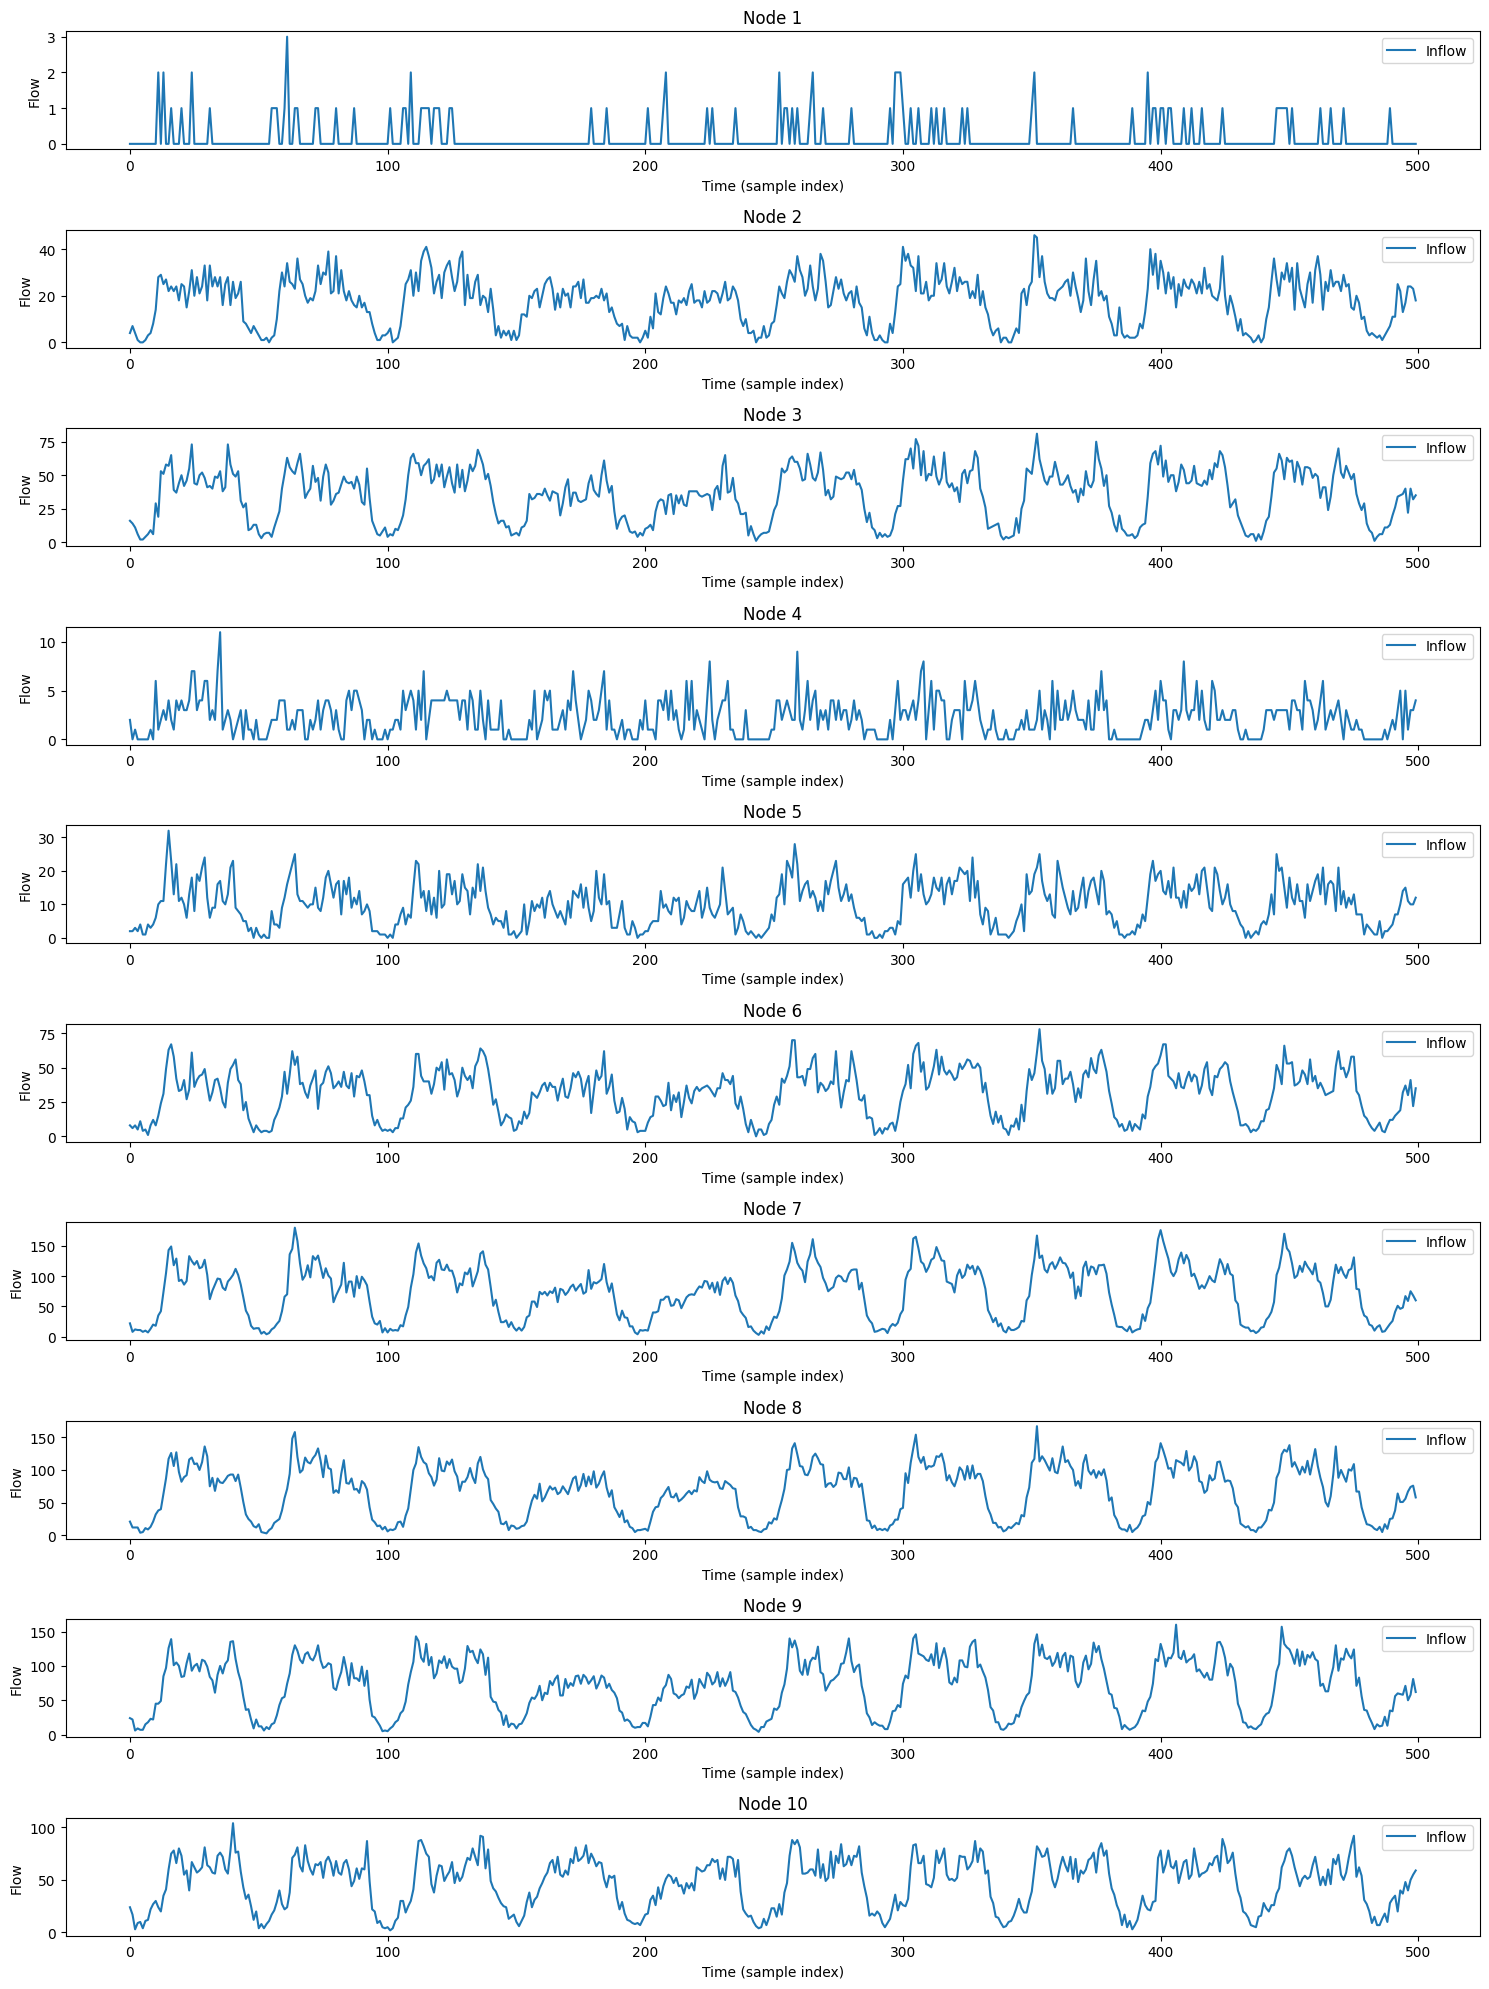

In [28]:
# y_train shape: (1912, 1, 200, 2)
## plot the timeseries at each node
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 20))
for node_index in range(10):
    inflow = y_train[0:500, 0, node_index, 0]
    # outflow = y_train[:, 0, node_index, 1]

    plt.subplot(10, 1, node_index + 1)
    plt.plot(inflow, label='Inflow')
    # plt.plot(outflow, label='Outflow')
    plt.title(f'Node {node_index + 1}')
    plt.xlabel('Time (sample index)')
    plt.ylabel('Flow')
    plt.legend()

plt.tight_layout()
plt.show()

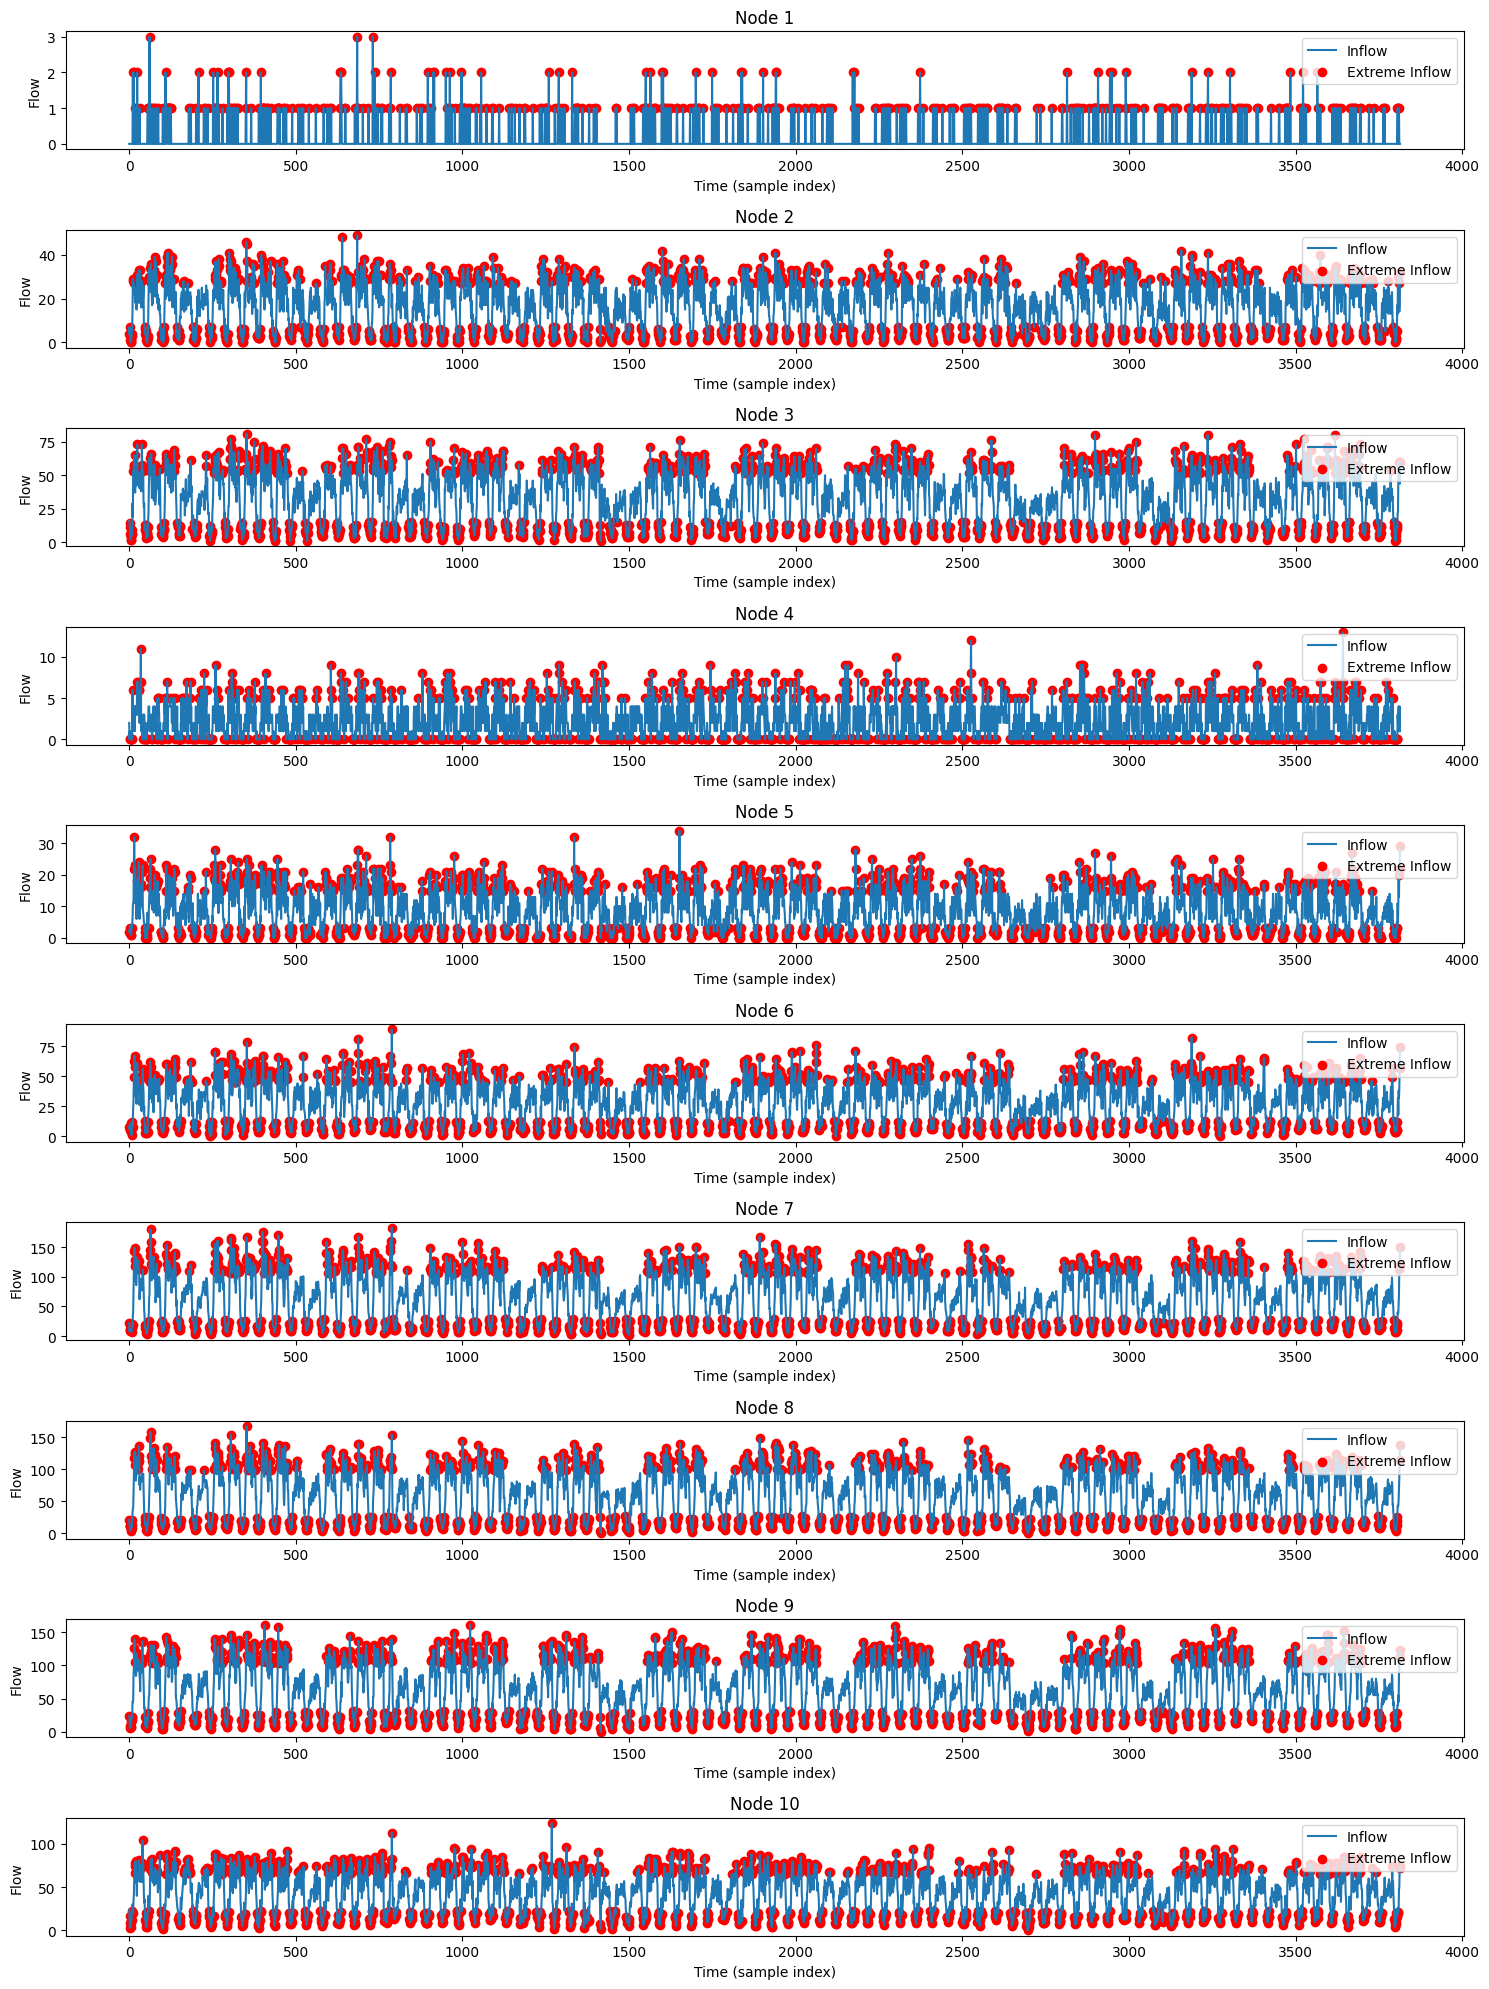

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## std dev away from mean

# Set up the plot
plt.figure(figsize=(15, 20))

# Z-score threshold for extreme events
z_threshold = 1

# Plotting the first 10 nodes
for node_index in range(10):
    inflow = y_train[:, 0, node_index, 0]
    # outflow = y_train[:, 0, node_index, 1]

    # Compute means and standard deviations
    mean_inflow = np.mean(inflow)
    std_inflow = np.std(inflow)
    # mean_outflow = np.mean(outflow)
    # std_outflow = np.std(outflow)

    # Identify extreme events
    extreme_inflow = np.where(np.abs((inflow - mean_inflow) / std_inflow) > z_threshold)[0]
    # extreme_outflow = np.where(np.abs((outflow - mean_outflow) / std_outflow) > z_threshold)[0]

    plt.subplot(10, 1, node_index + 1)
    plt.plot(inflow, label='Inflow')
    # plt.plot(outflow, label='Outflow')
    plt.scatter(extreme_inflow, inflow[extreme_inflow], color='red', label='Extreme Inflow', marker='o')
    # plt.scatter(extreme_outflow, outflow[extreme_outflow], color='blue', label='Extreme Outflow', marker='x')
    plt.title(f'Node {node_index + 1}')
    plt.xlabel('Time (sample index)')
    plt.ylabel('Flow')
    plt.legend()

plt.tight_layout()
plt.show()


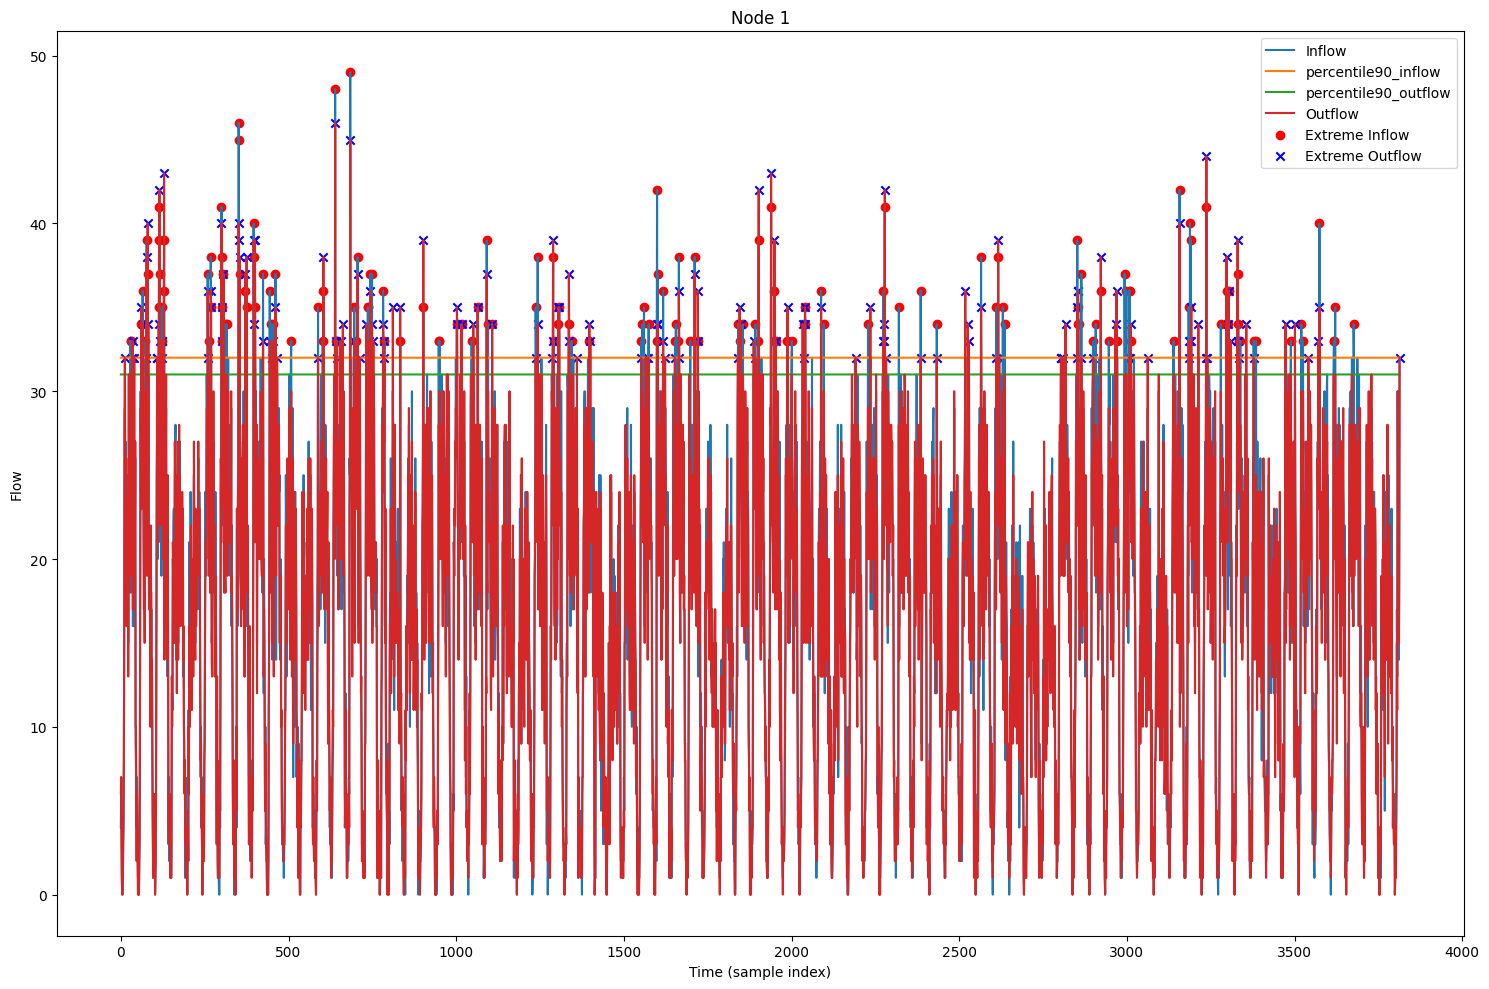

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## outside of xxth percentile
xx = 95
# Set up the plot
plt.figure(figsize=(15, 10))

# Plotting the first 10 nodes
for node_index in range(1):
    
    inflow = y_train[:, 0, node_index+1, 0]
    outflow = y_train[:, 0, node_index+1, 1]

    # Calculate the 90th percentile for inflow and outflow
    percentile90_inflow = np.percentile(inflow, xx)
    percentile90_outflow = np.percentile(outflow, xx)

    # Identify indices where data exceeds the 90th percentile
    extreme_inflow_indices = np.where(inflow > percentile90_inflow)[0]
    extreme_outflow_indices = np.where(outflow > percentile90_outflow)[0]

    plt.subplot(1, 1, node_index + 1)
    plt.plot(inflow, label='Inflow')
    # repeat percentile90_inflow to match the length of inflow
    percentile90_inflow = np.repeat(percentile90_inflow, len(inflow))
    percentile90_outflow = np.repeat(percentile90_outflow, len(outflow))
    plt.plot(percentile90_inflow, label='percentile90_inflow')
    plt.plot(percentile90_outflow, label='percentile90_outflow')

    plt.plot(outflow, label='Outflow')
    plt.scatter(extreme_inflow_indices, inflow[extreme_inflow_indices], color='red', label='Extreme Inflow', marker='o')
    plt.scatter(extreme_outflow_indices, outflow[extreme_outflow_indices], color='blue', label='Extreme Outflow', marker='x')
    plt.title(f'Node {node_index + 1}')
    plt.xlabel('Time (sample index)')
    plt.ylabel('Flow')
    plt.legend()

plt.tight_layout()
plt.show()


In [31]:
## create a binary tensor with indicators for extreme events

import numpy as np

# Assume y_train is already defined
# Initialize binary tensor

# Define the percentile
xx = 95

dataset = "BJTaxi"
for split in ["train", "val", "test"]:
    data_path = fr"D:\omer\ST-SSL\data\{dataset}\{split}.npz"
    x_train = np.load(data_path)["x"]
    y_train = np.load(data_path)["y"]
    extreme_values_binary_tensor = np.zeros_like(y_train)

    # Loop through each node and each direction (inflow, outflow)
    for node_index in range(y_train.shape[2]):  # Assuming y_train shape is [samples, timesteps, nodes, directions]
        for direction_index in range(y_train.shape[3]):
            # Get the data for current node and direction
            data = y_train[:, 0, node_index, direction_index]

            # Calculate the xxth percentile
            threshold = np.percentile(data, xx)

            # Find indices where data exceeds the threshold
            extreme_indices = np.where(data > threshold)[0]

            # Update the binary tensor
            extreme_values_binary_tensor[extreme_indices, 0, node_index, direction_index] = 1
    # np.savez(data_path, x=x_train, y=y_train, evs=extreme_values_binary_tensor)
    # extreme_values_binary_tensor now contains 1s at the indices of extreme values


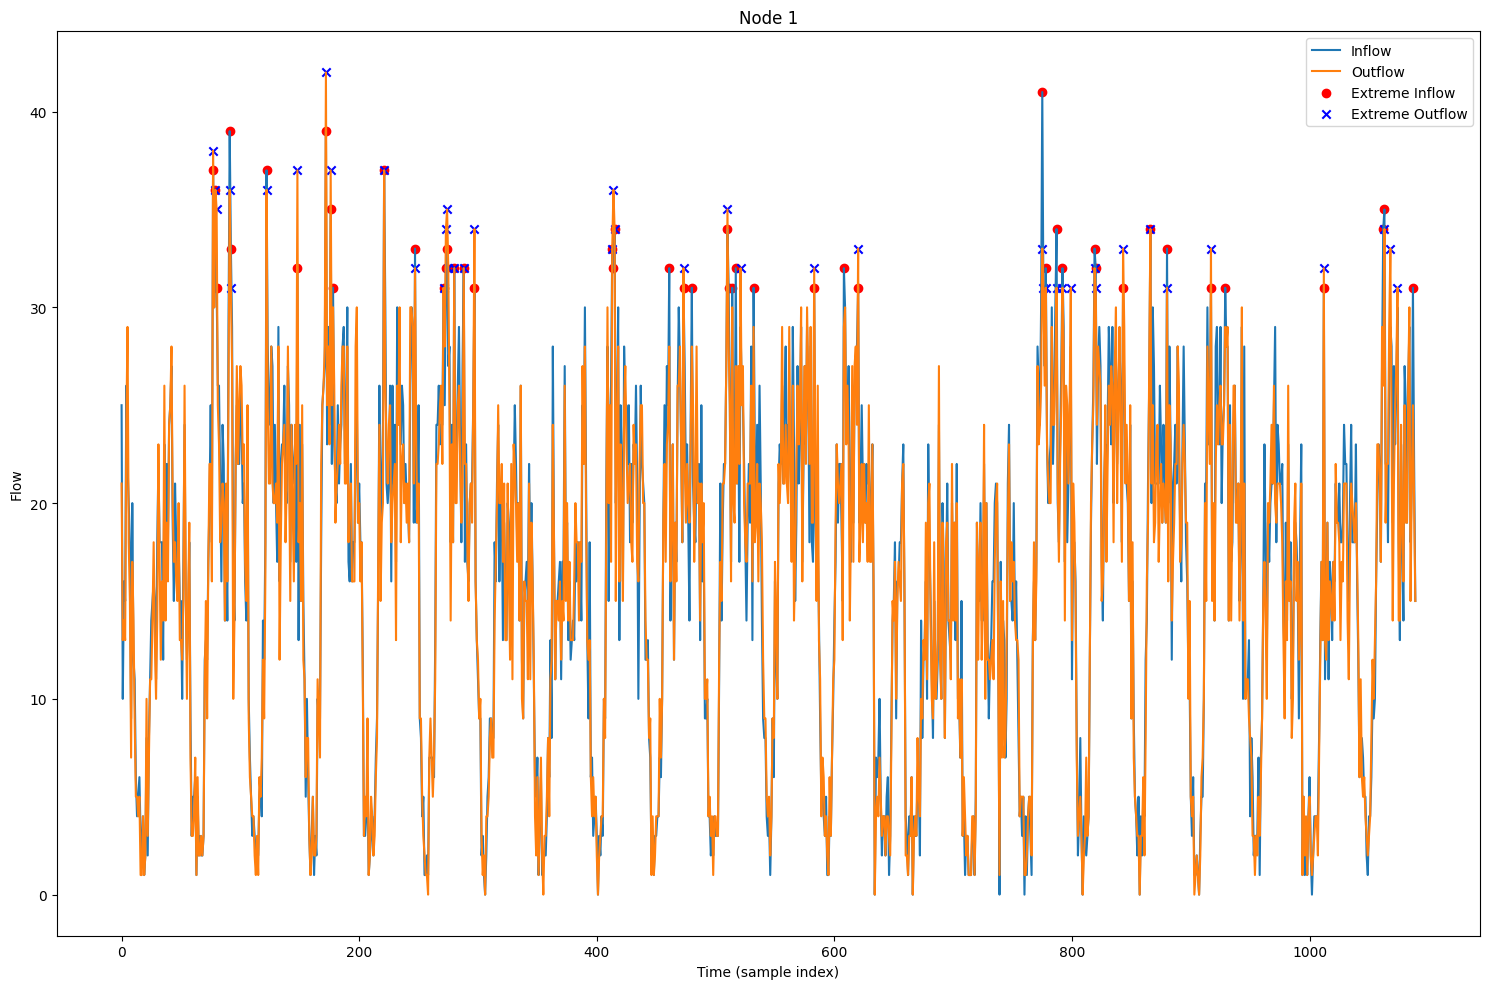

In [33]:
## plot from the newly defined binary tensor

import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and extreme_indicator_tensor are defined with the same shape
# and extreme_indicator_tensor contains 1 where there's an extreme event and 0 otherwise

# Set up the plot
plt.figure(figsize=(15, 10))

# Plotting for the first node (as the loop range is 1, it plots only the first node)
for node_index in range(1):
    inflow = y_train[:, 0, node_index+1, 0]
    outflow = y_train[:, 0, node_index+1, 1]
    
    # Extract extreme indicators for inflow and outflow
    extreme_inflow_indicator = extreme_values_binary_tensor[:, 0, node_index+1, 0]
    extreme_outflow_indicator = extreme_values_binary_tensor[:, 0, node_index+1, 1]
    
    # Identify indices where extreme events occur
    extreme_inflow_indices = np.where(extreme_inflow_indicator == 1)[0]
    extreme_outflow_indices = np.where(extreme_outflow_indicator == 1)[0]

    # Plotting inflow and outflow
    plt.subplot(1, 1, node_index + 1)
    plt.plot(inflow, label='Inflow')
    plt.plot(outflow, label='Outflow')

    # Marking the extreme events
    plt.scatter(extreme_inflow_indices, inflow[extreme_inflow_indices], color='red', label='Extreme Inflow', marker='o')
    plt.scatter(extreme_outflow_indices, outflow[extreme_outflow_indices], color='blue', label='Extreme Outflow', marker='x')

    plt.title(f'Node {node_index + 1}')
    plt.xlabel('Time (sample index)')
    plt.ylabel('Flow')
    plt.legend()

plt.tight_layout()
plt.show()


In [27]:
## save the extreme_values_binary_tensor
# import numpy as np
# np.savez(r"D:\omer\onlineJEPATrain\data\NYCTaxi\extreme_values_binary_tensor.npz", extreme_values_binary_tensor=extreme_values_binary_tensor)